In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.exposure import rescale_intensity
from tqdm import tqdm
import seaborn as sns

In [3]:
image = cv2.imread("dogs.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB).astype('float64') / 255

<Figure size 1080x1080 with 0 Axes>

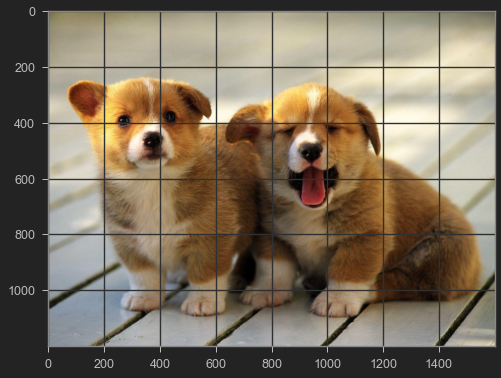

<Figure size 1080x1080 with 0 Axes>

In [4]:
plt.imshow(image.astype('float64'), cmap='gray')
plt.figure(figsize=(15, 15))

In [5]:
def convolve(image, kernel, iH, iW, kH, kW):
    pad = (kW - 1) // 2
    image = cv2.copyMakeBorder(image, pad, pad, pad, pad, cv2.BORDER_REPLICATE)

    output = np.zeros((iH, iW), dtype='float32')

    for y in tqdm(np.arange(pad, iH + pad)):
        for x in np.arange(pad, iW + pad):
            roi = image[y - pad: y + pad + 1, x - pad: x +  pad + 1]
            k = (roi * kernel).sum()
            output[y - pad, x - pad] = k

    return output

def convolve_and_show(image, kernel):
    output = convolve(image, kernel, image.shape[:2][0], 
    image.shape[:2][1], kernel.shape[:2][0], kernel.shape[:2][1])

    fig, ax1 = plt.subplots(1, 2, figsize=(20, 10))
    ax1[0].imshow(image.astype('float64'), cmap='gray')
    ax1[1].imshow(output,  cmap='gray')

    return output

In [10]:
def convolve_and_show(image, kernel):
    output = cv2.filter2D(image, -1, kernel)

    if output.min() < 0:
        output = np.abs(output)

    output = (output - output.min()) / (output.max() - output.min())

    print(output.max())
    print(output.min())

    fig, ax1 = plt.subplots(1, 2, figsize=(20, 10))
    ax1[0].imshow(image.astype('float64'), cmap='gray')
    ax1[1].imshow(output,  cmap='gray')

    return output

In [11]:
smallBlur = np.ones((7, 7), dtype="float") * (1.0 / (7 * 7))

largeBlur = np.ones((21, 21), dtype="float") * (1.0 / (21 * 21))

sharpen = np.array((
	[0, -1, 0],
	[-1, 5, -1],
	[0, -1, 0]), dtype="int")

1.0
0.0


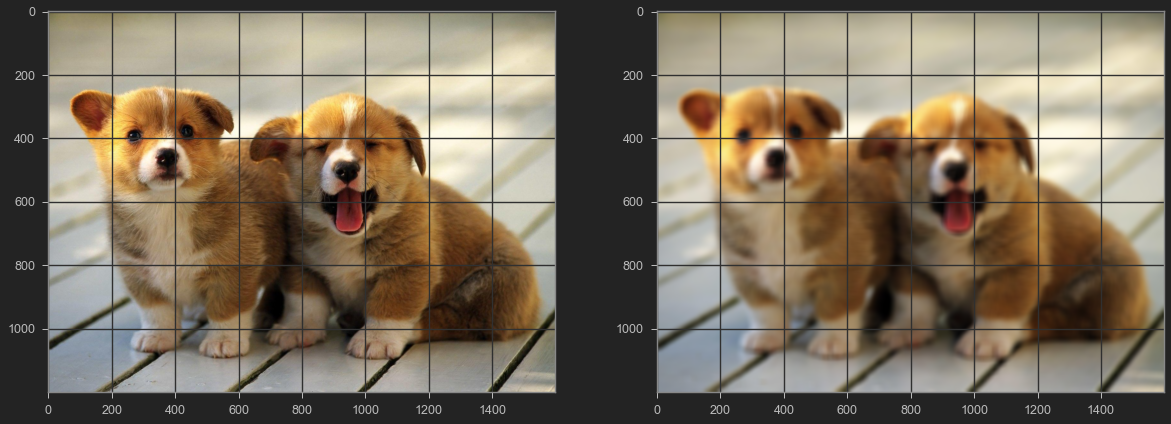

In [12]:
blur = convolve_and_show(image, largeBlur)

1.0
0.0


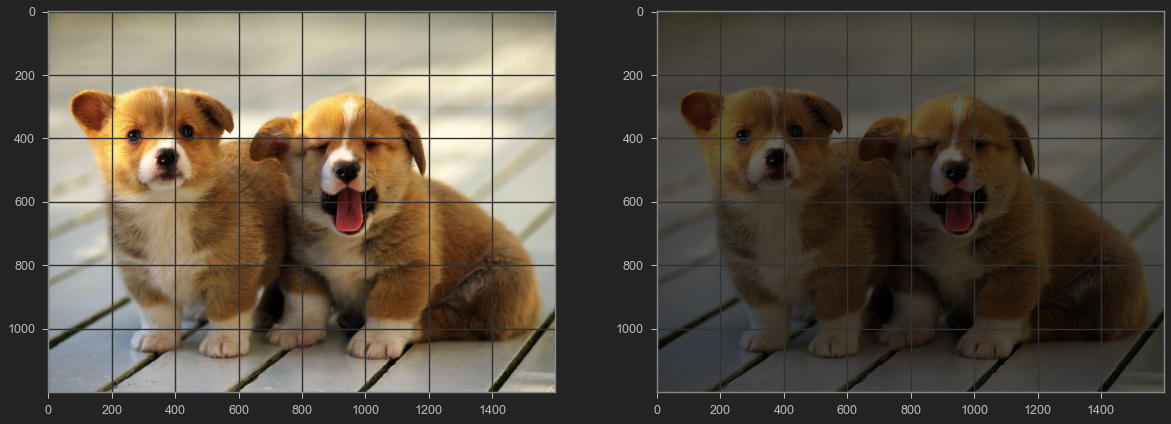

In [13]:
sharpened = convolve_and_show(image, sharpen)

In [19]:
with open("new_sharp.jpg", 'wb') as f:
    plt.imsave(f, sharpened, cmap='gray')

In [18]:
with open("new.jpg", 'wb') as f:
    plt.imsave(f, image, cmap='gray')

In [20]:
with open("new_blur.jpg", 'wb') as f:
    plt.imsave(f, blur, cmap='gray')

1.0
0.0


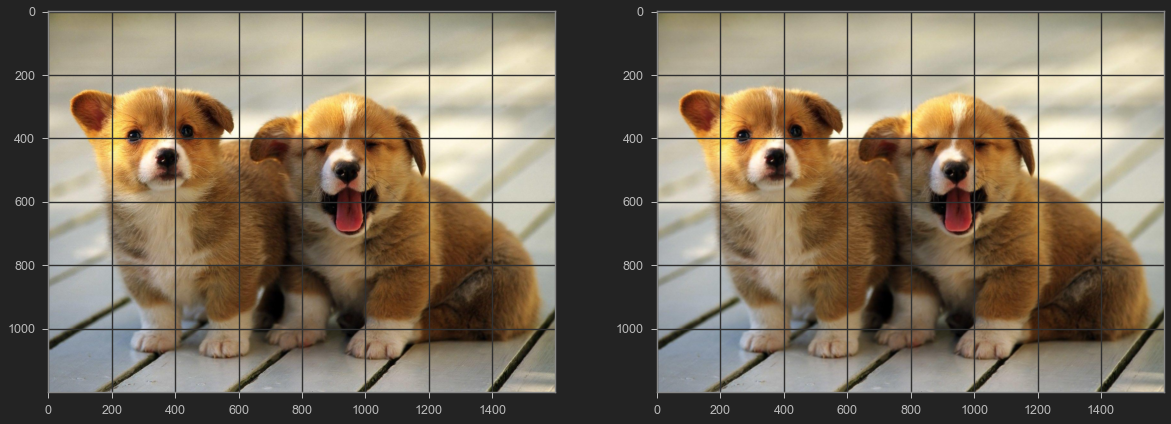

In [12]:
blur = np.array([
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9],
])

lightblur = convolve_and_show(image, blur)

1.0
0.0


True

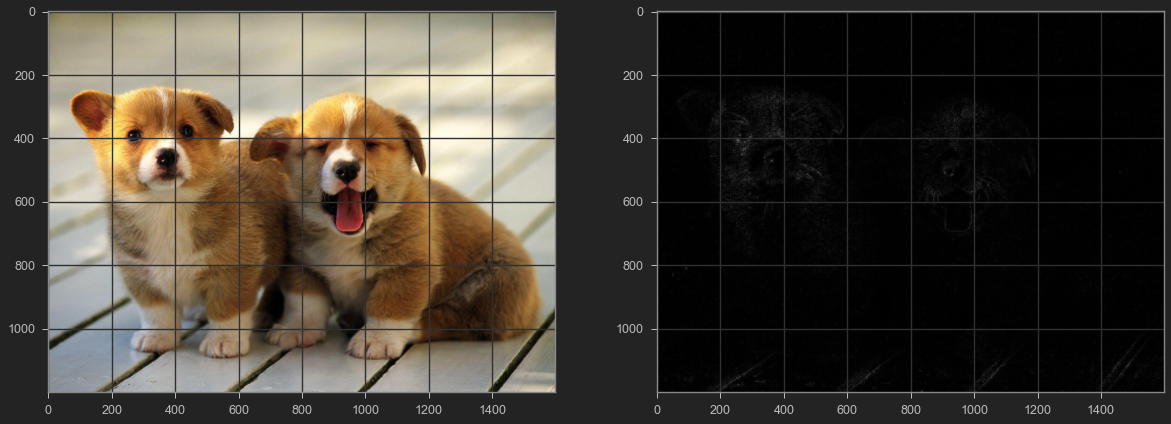

In [14]:
laplacian = np.asarray([
        [0, 1, 0],
        [1, -4, 1],
        [0, 1, 0],
])

edge = convolve_and_show(image, laplacian)

cv2.imwrite("new_edge_detection.jpg", edge)

1.0
0.0


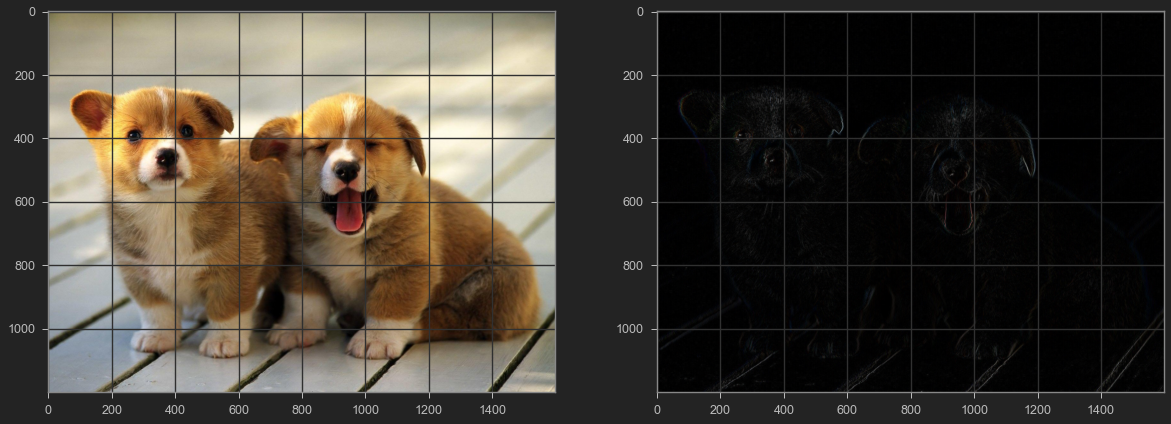

In [15]:
sobelX = np.array((
	[-1, 0, 1],
	[-2, 0, 2],
	[-1, 0, 1]
))

sX = convolve_and_show(image, sobelX)

with open("new_sobel.jpg", 'wb') as f:
    plt.imsave(f, sX, cmap='gray')

1.0
0.0


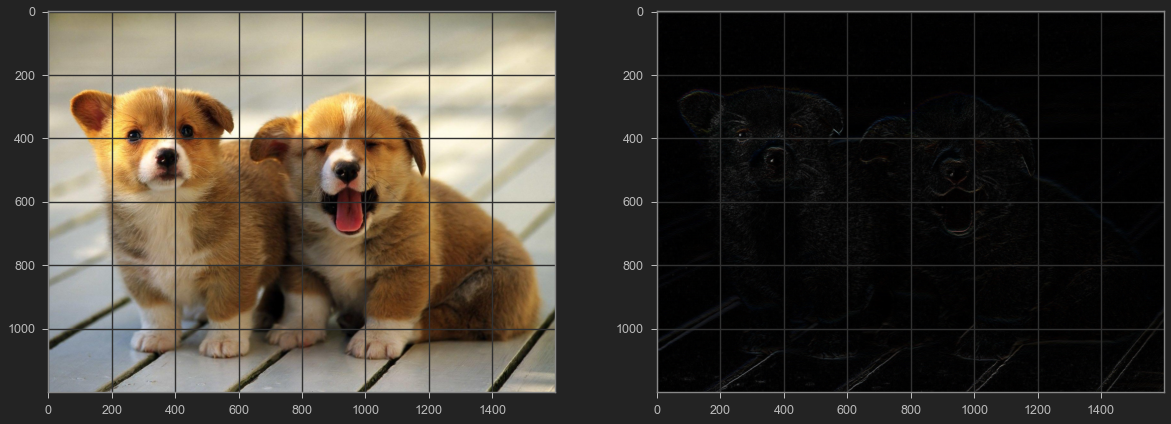

In [16]:
sY = convolve_and_show(image, sobelX.T)


with open("new_sobelY.jpg", 'wb') as f:
    plt.imsave(f, sY, cmap='gray')

1.0
0.0


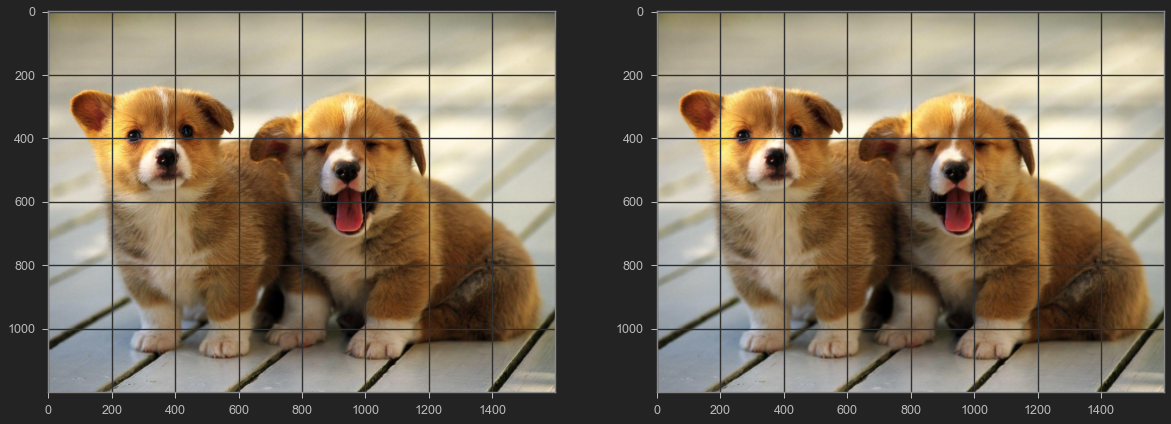

In [17]:
gaussian = np.asarray([
    [0.003, 0.0013, 0.022, 0.013, 0.003],
    [0.013, 0.060, 0.098, 0.060, 0.013],
    [0.022, 0.098, 0.162, 0.098, 0.022],
    [0.013, 0.060, 0.098, 0.060, 0.013],
    [0.003, 0.0013, 0.022, 0.013, 0.003],
]) * 10

gblur = convolve_and_show(image, gaussian)


with open("new_gaussian_blur.jpg", 'wb') as f:
    plt.imsave(f, gblur, cmap='gray')